/home/antash/workspace/MiniDiffuser/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


USING device cpu


/home/antash/workspace/MiniDiffuser/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|█████████████████████████████████| 70/70 [08:56<00:00,  7.66s/it]


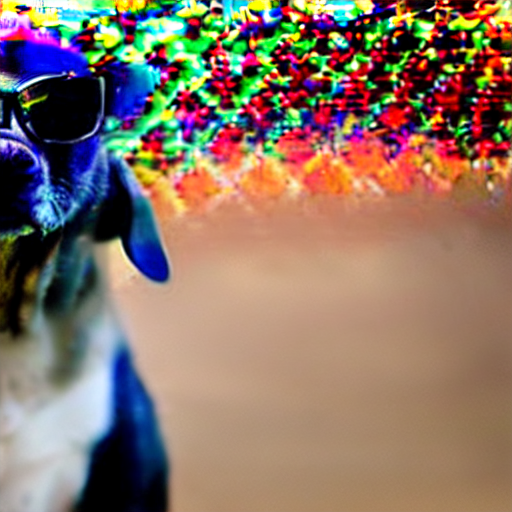

In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"

print(f"USING device {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

prompt = "A dog with sunglasses, wearing comfy hat, looking at camera."
uncond_prompt = ""

do_cfg = True
cfg_scale = 7.5

## IMAGE TO IMAGE

input_image = None
image_path = "../images/dog.jpg"
#input_image = Image.open(image_path)
strength=0.9

sampler = "ddpm"
num_inference_step = 70
seed = 42

output_image = pipeline.generate(
    prompt = prompt,
    uncond_prompt=uncond_prompt,
    input_image = None,
    strength= 0.9,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_step,
    models = models,
    seed=seed,
    device= DEVICE,
    idle_device= "cpu",
    tokenizer=tokenizer
)

Image.fromarray(output_image)

In [ ]:
import pipeline
pipeline.generate?

In [ ]:
!pip install transformers


In [ ]:
!pip install pynvml

In [15]:
import torch

In [16]:
torch.cuda.memory_allocated()

4617956864

In [ ]:
device = torch.cuda.get_device_properties(0)  # 0 is the device index

In [ ]:
device

In [ ]:
import torch

# Check CUDA availability
if torch.cuda.is_available():
    print("CUDA is available!")
    
    # Create a small tensor directly on the GPU
    x = torch.randn(1000, 1000, device='cuda')
    
    # Check memory allocation
    print(f"Memory allocated: {torch.cuda.memory_allocated() / (1024 ** 2)} MB")
    print(f"Memory reserved: {torch.cuda.memory_reserved() / (1024 ** 2)} MB")
else:
    print("CUDA not available.")


In [1]:
import torch

In [3]:
torch.device('cuda')

device(type='cuda')

In [10]:
torch.cuda.memory_allocated(device= torch.device('cuda'))

512

In [7]:
tensor = torch.rand(3, 3).cuda()  # or tensor.to('cuda')
print(torch.cuda.memory_allocated())  # Should now show allocated memor

512


In [18]:
torch.cuda.empty_cache()

In [20]:
torch.cuda.memory_reserved()

4924112896